# Проектная работа. Анализ рынка заведений общественного питания Москвы

Цель работы:

Провести исследование открытых данных рынка заведений общественного питания с целью открыть своё оригинальное кафе, в котором посетителей обслуживают роботы.

### Содержание:
<a class="anchor" id="step0"></a>

#### [1. Импорт необходимых библиотек и загрузка данных](#step1)

#### [2. Анализ данных:](#step2)</a>

[2.1. Исследование соотношения видов объектов общественного питания по количеству.](#step2)</a>

[2.2. Исследование соотношения сетевых и несетевых заведений по количеству.](#step3)</a>

[2.3. Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?](#step4)</a>

[2.4.Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.](#step5)</a>

[2.5.Выделите в отдельный столбец информацию об улице из столбца address](#step6)</a>

[2.6. Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?](#step7)</a>

[2.7. Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?](#step8)</a>

[2.8. Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?](#step9)</a>

#### [*3. Общий вывод*](#step10)</a>

Описание данных
Таблица rest_data:

    id — идентификатор объекта;
    object_name — название объекта общественного питания;
    chain — сетевой ресторан;
    object_type — тип объекта общественного питания;
    address — адрес;
    number — количество посадочных мест

Таблица mosgaz_streets:
    
    streetname - название улицы;
    areaid - id округа;
    okrug - аббревеатура округа;
    area - название района

## <a class="anchor" id="step1">[1. Импорт необходимых библиотек и загрузка данных](#step0)</a>

In [1]:
!pip install -U seaborn

Requirement already up-to-date: seaborn in c:\program files\anaconda3\lib\site-packages (0.11.1)


In [2]:
# Импортирование библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
import re
import warnings
warnings.simplefilter('ignore')

In [3]:
# Загрузка данных
filepath1 = r'C:\Users\Torberg\Documents\Yandex Projects\Project8\rest_data.csv'
filepath2 = r'C:\Users\Torberg\Documents\Yandex Projects\Project8\mosgaz-streets.csv'

rest_data = pd.read_csv(filepath1)
district_data = pd.read_csv(filepath2)
display(rest_data.sample(5))
display(district_data.sample(5))

id             object_name chain  \
14172  206289             ШАУРМА КИНГ   нет   
13981  220730             Be my pizza   нет   
7171    82567             Бургер Кинг    да   
5791    80752  БИЗЕС-ЦЕНТР КАРАЧАРОВО   нет   
1148   155495                Суши Wok    да   

                             object_type  \
14172  предприятие быстрого обслуживания   
13981  предприятие быстрого обслуживания   
7171   предприятие быстрого обслуживания   
5791                            столовая   
1148                                кафе   

                                                 address  number  
14172            город Москва, Алтуфьевское шоссе, дом 8       6  
13981    город Москва, Каширское шоссе, дом 57, корпус 4       0  
7171             город Москва, Дмитровское шоссе, дом 89      40  
5791   город Москва, Рязанский проспект, дом 2, строе...      60  
1148            город Москва, Таганская улица, дом 31/22       0

streetname  areaid okrug                 area
332                Дегтярный переулок      19   ЦАО       Тверской район
1879  улица Авиаконструктора Яковлева      54   САО       Район Аэропорт
533              Озерковский переулок      14   ЦАО  Район Замоскворечье
344              Долгоруковская улица      19   ЦАО       Тверской район
1525             Мичуринский проспект      45   ЗАО        Район Раменки

### Предобработка данных

In [4]:
# Поиск пропусков в датасете rest_data
def nans_counter(column, data):
    print('Количество пропусков в столбце', column, ':',
          ((data[column].isna().sum()/len(data[column])*100).round()), '%')


for column in rest_data:
    nans_counter(column, rest_data)

Количество пропусков в столбце id : 0.0 %
Количество пропусков в столбце object_name : 0.0 %
Количество пропусков в столбце chain : 0.0 %
Количество пропусков в столбце object_type : 0.0 %
Количество пропусков в столбце address : 0.0 %
Количество пропусков в столбце number : 0.0 %


In [5]:
# Поиск дубликатов в датасете rest_data
print(rest_data.duplicated().sum())

0


In [6]:
maybe_duplicates = rest_data.groupby('id').agg({'object_name': 'nunique',
                                                'address': 'nunique'})
display(maybe_duplicates.count())


object_name    15366
address        15366
dtype: int64

In [7]:
# Изучение типов данных в датасете rest_data
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [8]:
# Поиск пропусков в датасете district_data
for column in district_data:
    nans_counter(column, district_data)

Количество пропусков в столбце streetname : 0.0 %
Количество пропусков в столбце areaid : 0.0 %
Количество пропусков в столбце okrug : 0.0 %
Количество пропусков в столбце area : 0.0 %


In [9]:
# Поиск дубликатов в датасете district_data. 8 пропусков - удалены
district_data = district_data.drop_duplicates()
print(district_data.duplicated().sum())

0


In [10]:
# Изучение типов данных в датасете district_data
district_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4390 entries, 0 to 4397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   streetname  4390 non-null   object
 1   areaid      4390 non-null   int64 
 2   okrug       4390 non-null   object
 3   area        4390 non-null   object
dtypes: int64(1), object(3)
memory usage: 171.5+ KB


#### Вывод: загружен датасет rest_data с открытыми данными из 6 столбцов и 15366 строк. Дубликатов и пропусков не обнаружено, тип данных изменять не нужно. Загружен датасет district_data с информацией о принадлежности улиц Москвы к тому или иному району из 4 столбцов и 4390 строк. Пропусков в данных не обнаружено, тип данных изменять не нужно. Было найдено и удалено 8 дубликатов.



## <a class="anchor" id="step2">[2. Анализ данных](#step0)</a>

#### <a class="anchor" id="step2">[2.1 Исследование соотношения видов объектов общественного питания по количеству](#step0)</a>

In [11]:
# Переименуем типы заведений
rest_data['object_type'][rest_data['object_type'] ==
                         'предприятие быстрого обслуживания'] = 'фастфуд'
rest_data['object_type'][rest_data['object_type'] ==
                         'магазин (отдел кулинарии)'] = 'отдел кулинарии'

# переименуем значение "да/нет" на "сетевое/несетевое":
rest_data['chain'][rest_data['chain'] == 'да'] = 'сетевое'
rest_data['chain'][rest_data['chain'] == 'нет'] = 'несетевое'

In [12]:
# Подсчет видов объектов общественного питания
rest_type = rest_data.groupby(
    'object_type', as_index=False).agg({'id': 'count'})
rest_type.columns = ['object_type', 'count']
display(rest_type.sort_values(by='count', ascending=False))

object_type  count
3             кафе   6099
7         столовая   2587
6         ресторан   2285
8          фастфуд   1923
0              бар    856
1            буфет    585
4        кафетерий    398
2       закусочная    360
5  отдел кулинарии    273

In [13]:
# Построение графика
fig = go.Figure(
    data=[go.Pie(labels=rest_type['object_type'], values=rest_type['count'])])
fig.update_layout(
    title='Соотношение видов объектов<br>общественного питания по количеству')
fig.show()

#### Промежуточный вывод: лидерами среди открываемых общепитов являются - кафе, столовая, ресторан и предприятие общественного питания. Остальных заведений более чем в 2 раза меньше.

#### <a class="anchor" id="step3">[2.2 Исследование соотношения сетевых и несетевых заведений по количеству.](#step0)</a>

In [14]:
# Подсчет сетевых/несетевых заведений в разрезе видов объектов
chain_rest_count = rest_data.groupby(['object_type', 'chain']).agg({
    'id': 'count'}).reset_index()
#chain_rest_count.columns = ['object_type','chain', 'count']
display(chain_rest_count)

object_type      chain    id
0               бар  несетевое   819
1               бар    сетевое    37
2             буфет  несетевое   574
3             буфет    сетевое    11
4        закусочная  несетевое   304
5        закусочная    сетевое    56
6              кафе  несетевое  4703
7              кафе    сетевое  1396
8         кафетерий  несетевое   346
9         кафетерий    сетевое    52
10  отдел кулинарии  несетевое   195
11  отдел кулинарии    сетевое    78
12         ресторан  несетевое  1741
13         ресторан    сетевое   544
14         столовая  несетевое  2584
15         столовая    сетевое     3
16          фастфуд  несетевое  1132
17          фастфуд    сетевое   791

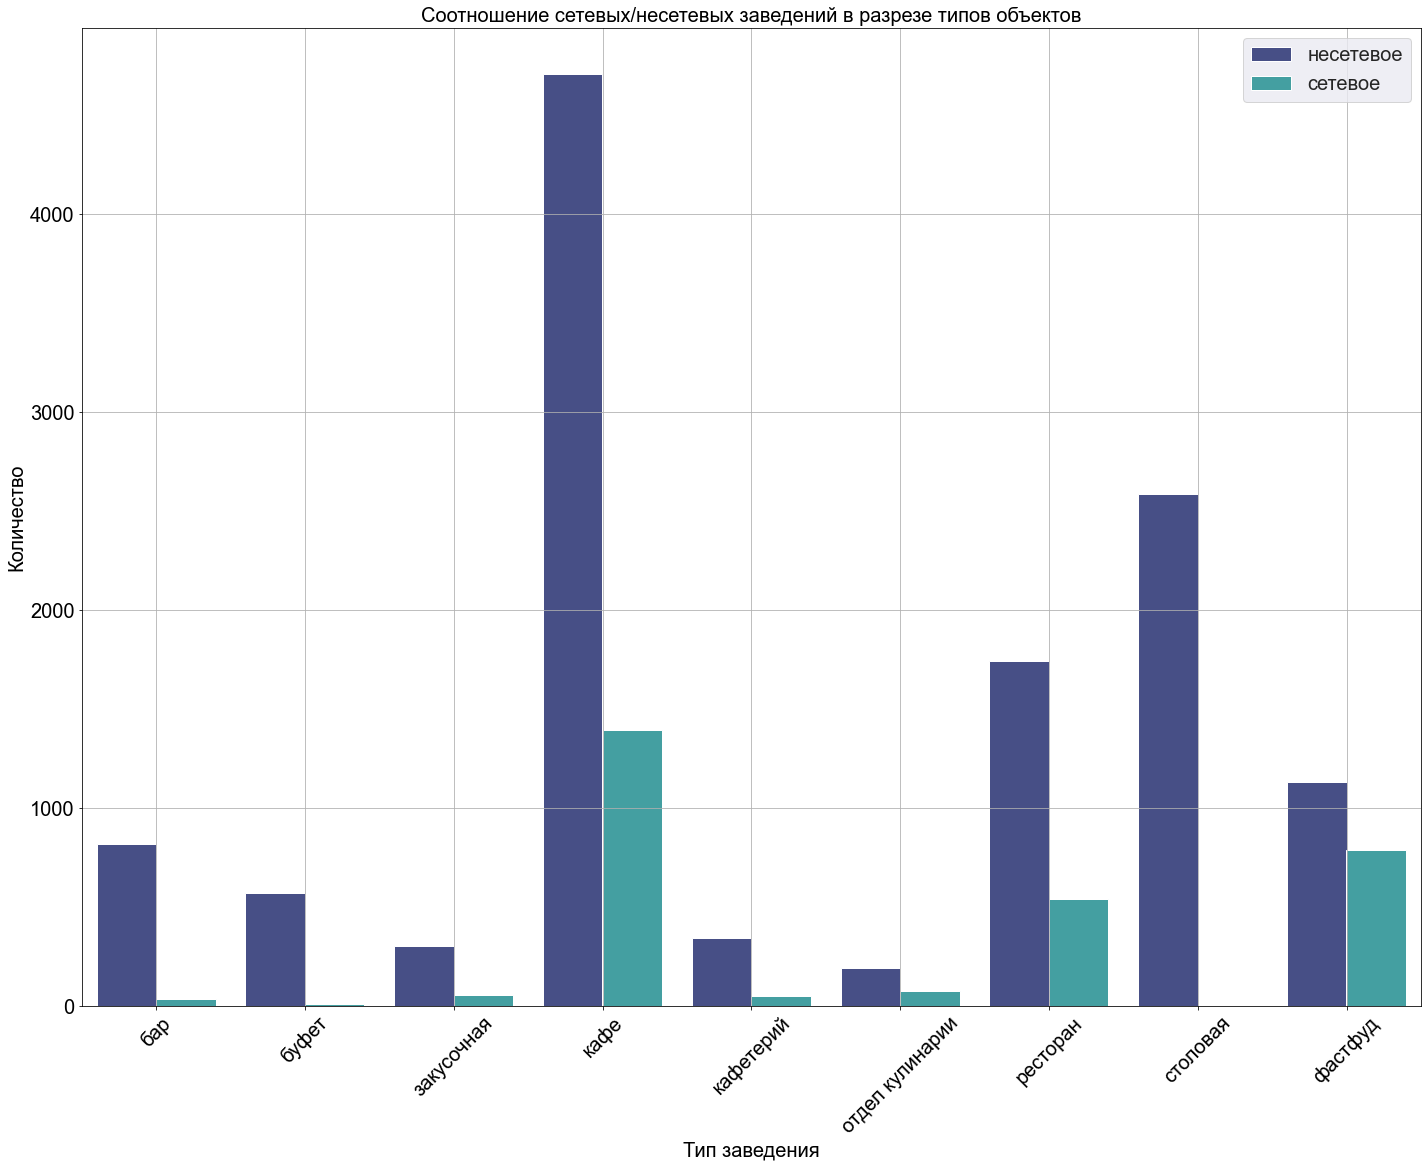

In [15]:
# Построение графика
fig, ax = plt.subplots(figsize=(24, 18))
sns.set_style('darkgrid')

fig = sns.barplot(x="object_type", y="id", hue="chain",
                  data=chain_rest_count, palette='mako', saturation=.8)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.title(
    'Соотношение сетевых/несетевых заведений в разрезе типов объектов', fontsize=20)
plt.xlabel("Тип заведения", fontsize=20)
plt.ylabel("Количество", fontsize=20)
plt.legend(fontsize=20)
plt.grid(True)
#plt.savefig('22', dpi=200, format='png')
plt.show()

#### Промежуточный вывод: по всем типам объектов общественного питания можно предположить, что несетевые заведения преобладют над сетевыми. Причем кроме предприятий быстрого обслуживания - для них различие не настолько значимо, как для предприятий быстрого обслуживания.

In [16]:
# Почитаем общее количество заведений каждого типа
object_type_count = (rest_data.groupby('object_type')
                     .agg({'id': 'count'})
                     .sort_values(by='id', ascending=False)
                     .reset_index())

object_type_count.columns = ['object_type', 'total_id']
display(object_type_count)

object_type  total_id
0             кафе      6099
1         столовая      2587
2         ресторан      2285
3          фастфуд      1923
4              бар       856
5            буфет       585
6        кафетерий       398
7       закусочная       360
8  отдел кулинарии       273

In [17]:
# сгруппируем таблицу по "chain" и "object_type" c подсчётом "id"
chain_objecttype_count = (rest_data[rest_data['chain'] == 'сетевое']
                          .groupby(['chain', 'object_type'])
                          .agg({'id': 'count'})
                          )

# объеденим с общим подсчётом всех типов заведений
chain_objecttype_count = (chain_objecttype_count
                          .merge(object_type_count, on='object_type'))

# посчитаем процент сетевых заведений по каждому типу от общего:
chain_objecttype_count['id_perc'] = round(chain_objecttype_count['id'] /
                                          chain_objecttype_count['total_id']*100, 2).astype('int64')
chain_objecttype_count = (chain_objecttype_count
                          .sort_values(by='id_perc', ascending=False))

display(chain_objecttype_count)

object_type    id  total_id  id_perc
8          фастфуд   791      1923       41
5  отдел кулинарии    78       273       28
6         ресторан   544      2285       23
3             кафе  1396      6099       22
2       закусочная    56       360       15
4        кафетерий    52       398       13
0              бар    37       856        4
1            буфет    11       585        1
7         столовая     3      2587        0

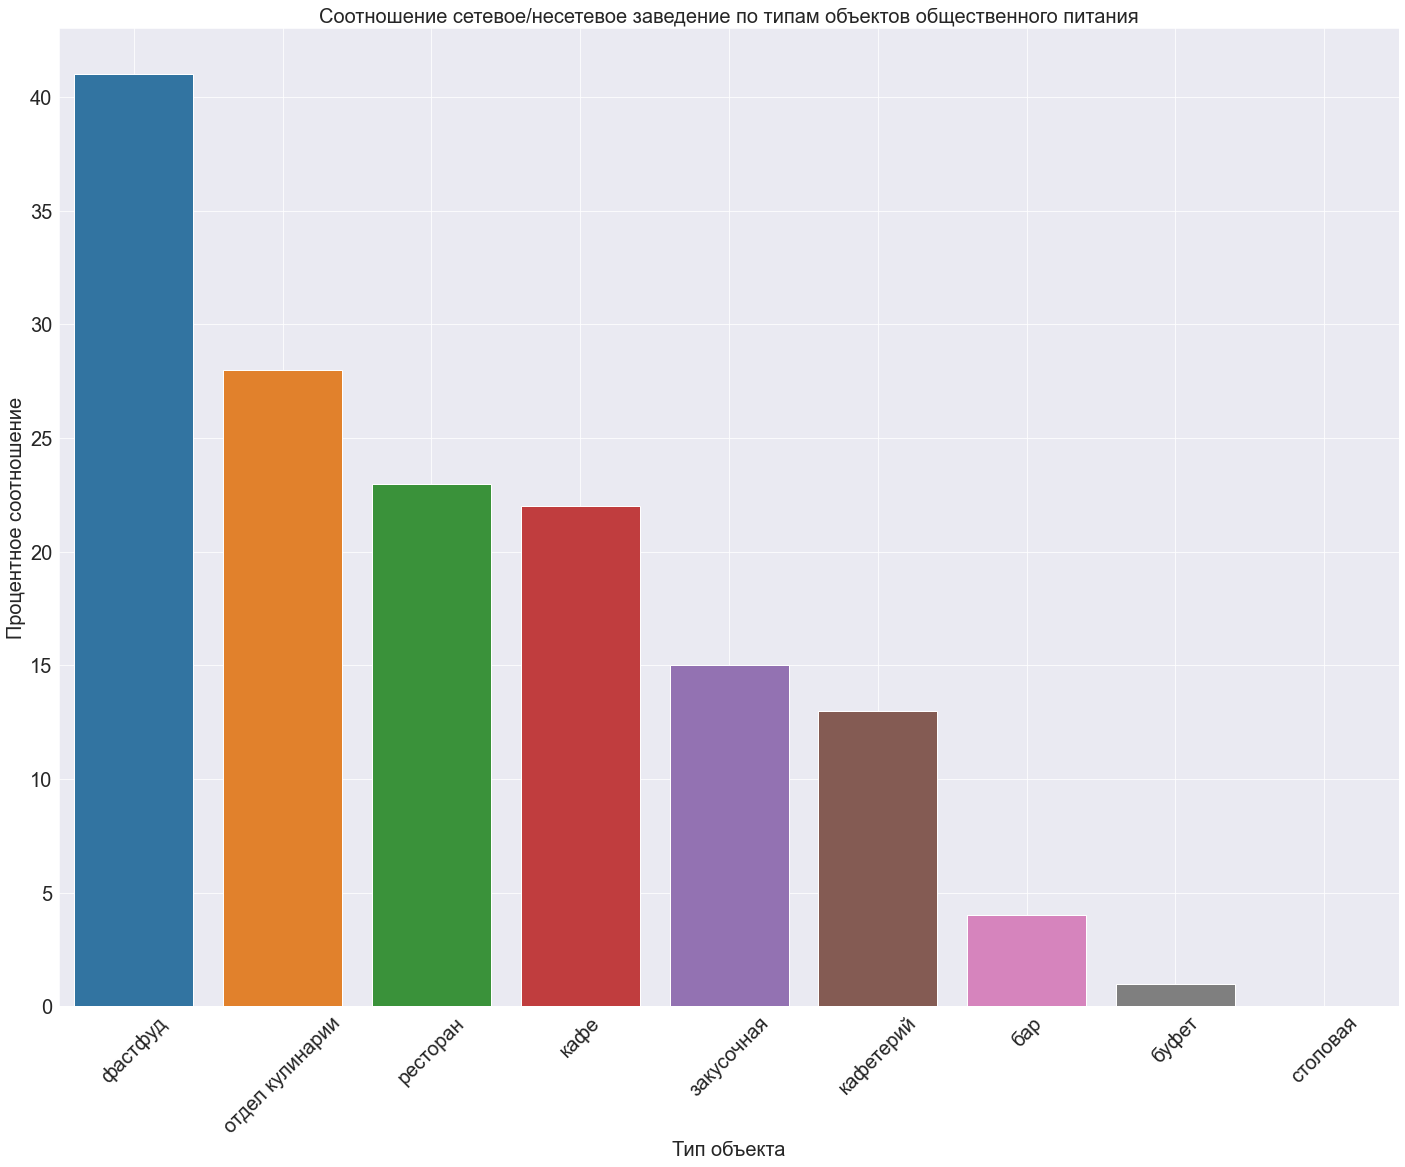

In [18]:
# Построим график
fig, ax = plt.subplots(figsize=(24, 18))
sns.set_style('darkgrid')
sns.barplot(x='object_type', y='id_perc', data=chain_objecttype_count)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.title('Соотношение сетевое/несетевое заведение по типам объектов общественного питания', fontsize=20)
plt.xlabel('Тип объекта', fontsize=20)
plt.ylabel('Процентное соотношение', fontsize=20)
#plt.savefig('23', dpi=200, format='png')
plt.grid(True)
plt.show()

#### Промежуточный вывод: наилучшее соотношение сетевых объектов к несетевым показывает фастфуд - 41%. Все остальные типы объектов показывают еще меньшее соотношение - менее 28%.

#### <a class="anchor" id="step4">[2.3 Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?](#step0)</a>

In [19]:
# Посмотрим сколько же заведений с малым количеством мест и сколько с большим
print(np.percentile(rest_data[rest_data['number'] != 0]['number'], [25, 75]))

[20. 85.]


In [20]:
many_seats = rest_data['id'][(rest_data['number'] >= 85) & (
    rest_data['chain'] == 'сетевое')].count()
small_seats = rest_data['id'][(rest_data['number'] <= 20) & (
    rest_data['chain'] == 'несетевое') & (rest_data['number'] > 0)].count()

num_chain_count = pd.DataFrame([many_seats, small_seats],
                               index=['большое количество<br>посадочных мест (больше 85 мест)',
                                      'малое количество<br>посадочных мест (меньше 20 мест)'])
num_chain_count.columns = ['rest_count']

In [21]:
# Построение графика
fig = go.Figure(data=[go.Pie(labels=num_chain_count.index,
                             values=num_chain_count['rest_count'])])
fig.update_layout(
    title='Соотношение<br>сетевых заведений<br>по количеству мест')
fig.show()

#### Промежуточный вывод: для сетевых заведений характерно: большое количество заведений с малым количеством посадочных мест.

#### <a class="anchor" id="step5">[2.4 Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.](#step0)</a>

In [22]:
# Посчитаем среднее количество мест для каждого типа заведения
mean_number = rest_data.groupby('object_type')['number'].mean().reset_index()
mean_number['number'] = mean_number['number'].astype('int')

display(mean_number.sort_values(by='number', ascending=False))

object_type  number
7         столовая     130
6         ресторан      96
1            буфет      51
0              бар      43
3             кафе      39
8          фастфуд      20
4        кафетерий       9
2       закусочная       7
5  отдел кулинарии       5

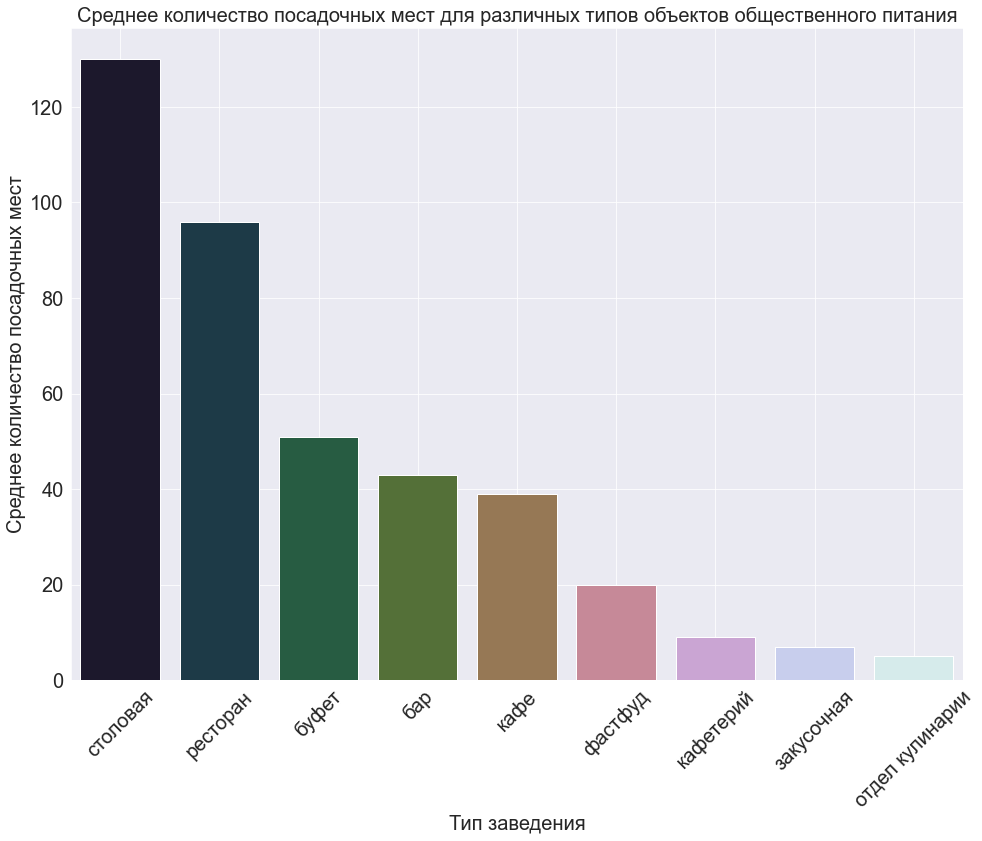

In [23]:
# Построим график

fig, ax = plt.subplots(figsize=(16, 12))
sns.set_style('darkgrid')
fig = sns.barplot(data=mean_number.sort_values(
    by='number', ascending=False), x='object_type', y='number', palette='cubehelix')
plt.xticks(rotation=45)
plt.title('Среднее количество посадочных мест для различных типов объектов общественного питания', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Тип заведения', fontsize=20)
plt.ylabel('Среднее количество посадочных мест', fontsize=20)
#plt.savefig('24', dpi=200, format='png')
plt.grid(True)
plt.show()

#### Промежуточный вывод: наибольшее количество посадочных мест предоставляют столовые и рестораны. Бары, буфеты и кафе имеют примерно одинаковое среднее количество посадочных мест. Аутсайдерами являются кафетерий и предприятие быстрого обслуживания. Закусочные и магазины посадочных мест не предоставляют.

#### <a class="anchor" id="step6">[2.5 Выделите в отдельный столбец информацию об улице из столбца address ](#step0)</a>

In [24]:
# Посчитаем сколько объектов попало в датасет из Подмосковья
rest_data['city'] = rest_data['address'].apply(lambda x: x.split(', ')[0])
rest_data['id'][rest_data['city'] != 'город Москва'].count()

71

Получилось менее 1% всех объектов - можно удалить эти данные

In [25]:
rest_data_moscow = rest_data[rest_data['city'] == 'город Москва']

In [26]:
# Создадим и применим к датафрейму 2 функции для очистки данных
def rep_func(row):
    return row['address'].replace('город Москва,', '')\
                         .replace('дом', '')\
                         .replace('корпус', '')\
                         .replace('строение', '')\
                         .replace('сооружение', '')\
                         .replace('владение', '')\
                         .replace('овладение', '')\
                         .replace('ЗОНА', '')


rest_data_moscow['address_info'] = rest_data_moscow.apply(rep_func, axis=1)


def re_func(row):
    return (' ').join(re.findall('^[0-9]-\D|[А-яё]+[А-яё]+', row['address_info']))


rest_data_moscow['street'] = rest_data_moscow.apply(re_func, axis=1)
display(rest_data_moscow.sample(5))

id      object_name      chain object_type  \
12643  197151        Шаурмания  несетевое        кафе   
2219    58469  Кафе «Карамель»  несетевое        кафе   
14011  210372            Bushe  несетевое        кафе   
14186  216338      Есть бургер  несетевое     фастфуд   
8010   158117        Марчеллис    сетевое    ресторан   

                                                 address  number  \
12643           город Москва, Алтуфьевское шоссе, дом 58      10   
2219         город Москва, Дружинниковская улица, дом 15     100   
14011  город Москва, Театральный проезд, дом 5, строе...      42   
14186                город Москва, Снежная улица, дом 27      10   
8010   город Москва, улица Большая Дмитровка, дом 5/6...     170   

               city                        address_info  \
12643  город Москва             Алтуфьевское шоссе,  58   
2219   город Москва          Дружинниковская улица,  15   
14011  город Москва          Театральный проезд,  5,  1   
14186  город Москва                  Снежная улица,  27   
8010   город Москва   улица Большая Дмитровка,  5/6,  4   

                        street  
12643       Алтуфьевское шоссе  
2219     Дружинниковская улица  
14011       Театральный проезд  
14186            Снежная улица  
8010   улица Большая Дмитровка

In [27]:
# запишем в более ненужный столбец информацию - попали ли вместо улицы города или поселения Московской области:
rest_data_moscow['street_info'] = (rest_data_moscow['street']
                                   .apply(lambda x: x.split(' ')[0]))

# посмотрим на количество городов которые попали в нашу выборку:
print(rest_data_moscow['id']
      [rest_data_moscow['street_info'] == 'город'].count())
print(rest_data_moscow['id']
      [rest_data_moscow['street_info'] == 'поселение'].count())

399
416


In [28]:
# их не так много, удалим их:
rest_data_moscow = rest_data_moscow[(rest_data_moscow['street_info'] != 'город') &
                                    (rest_data_moscow['street_info'] != 'поселение')]

# удалим ненужные столбцы
rest_data_moscow.drop(
    ["city", "address_info", "street_info"], axis=1, inplace=True)

# посмотрим что получилось:
display(rest_data_moscow.head())
print(len(rest_data_moscow['id']))

id             object_name      chain object_type  \
0  151635                 СМЕТАНА  несетевое        кафе   
1   77874                  Родник  несетевое        кафе   
2   24309         Кафе «Академия»  несетевое        кафе   
3   21894              ПИЦЦЕТОРИЯ    сетевое        кафе   
4  119365  Кафе «Вишневая метель»  несетевое        кафе   

                                             address  number  \
0         город Москва, улица Егора Абакумова, дом 9      48   
1  город Москва, улица Талалихина, дом 2/1, корпус 1      35   
2          город Москва, Абельмановская улица, дом 6      95   
3            город Москва, Абрамцевская улица, дом 1      40   
4  город Москва, Абрамцевская улица, дом 9, корпус 1      50   

                  street  
0  улица Егора Абакумова  
1       улица Талалихина  
2   Абельмановская улица  
3     Абрамцевская улица  
4     Абрамцевская улица

14480


#### <a class="anchor" id="step7">[2.6 Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?](#step0)</a>

In [29]:
# Для поиска самых популярных районов присоединим датафрейм district_data
display(district_data.sample(5))
rest_data_dist = rest_data_moscow.merge(
    district_data, left_on='street', right_on='streetname')
display(rest_data_dist.sample(5))

streetname  areaid okrug                 area
3997             Старокалужское шоссе     129  ЮЗАО    Обручевский район
3661          Орехово-Зуевский проезд     117  ЮВАО  Нижегородский район
1879  улица Авиаконструктора Яковлева      54   САО       Район Аэропорт
879                   Перовское шоссе      32   ВАО         Район Перово
3650              Карачаровская улица     117  ЮВАО  Нижегородский район

id                         object_name      chain object_type  \
3888   182682                Пекарня «Вкус хлеба»  несетевое        кафе   
20392   27500  Столовая ГБОУ школа № 1502 при МЭИ  несетевое    столовая   
12395  151965              Кафе «Крошка-картошка»  несетевое        кафе   
2808   189776            Ресторан «ВЕЧЕРНИЙ БАКУ»  несетевое    ресторан   
18458  193318    Самородинов Сергей Александрович  несетевое        кафе   

                                                 address  number  \
3888   город Москва, проспект Вернадского, дом 105, к...       2   
20392           город Москва, шоссе Энтузиастов, дом 96Б     240   
12395    город Москва, проспект Мира, дом 95, строение 1      20   
2808              город Москва, Варшавское шоссе, дом 27     300   
18458  город Москва, улица Сущёвский Вал, дом 5, стро...      10   

                     street            streetname  areaid okrug  \
3888   проспект Вернадского  проспект Вернадского      44   ЗАО   
20392     шоссе Энтузиастов     шоссе Энтузиастов      32   ВАО   
12395         проспект Мира         проспект Мира      82  СВАО   
2808       Варшавское шоссе      Варшавское шоссе     102   ЮАО   
18458   улица Сущёвский Вал   улица Сущёвский Вал      19   ЦАО   

                             area  
3888   Район Проспект Вернадского  
20392                Район Перово  
12395              Район Свиблово  
2808     Район Нагатино-Садовники  
18458              Тверской район

In [30]:
# найдем топ10 улиц Москвы по количеству заведений
top_streets = rest_data_moscow.groupby('street', as_index=False)['id'].count()
top10_streets = top_streets.sort_values(by='id', ascending=False)[0:10]


top10_str_dist = top10_streets.merge(
    district_data, left_on='street', right_on='streetname')

display(top10_str_dist)

street   id              streetname  areaid okrug  \
0            проспект Мира  204           проспект Мира      70  СВАО   
1            проспект Мира  204           проспект Мира      86  СВАО   
2            проспект Мира  204           проспект Мира      78  СВАО   
3            проспект Мира  204           проспект Мира      79  СВАО   
4            проспект Мира  204           проспект Мира      81  СВАО   
5            проспект Мира  204           проспект Мира      82  СВАО   
6            проспект Мира  204           проспект Мира      16   ЦАО   
7        Профсоюзная улица  182       Профсоюзная улица     123  ЮЗАО   
8        Профсоюзная улица  182       Профсоюзная улица     132  ЮЗАО   
9        Профсоюзная улица  182       Профсоюзная улица     134  ЮЗАО   
10       Профсоюзная улица  182       Профсоюзная улица     126  ЮЗАО   
11       Профсоюзная улица  182       Профсоюзная улица     129  ЮЗАО   
12       Профсоюзная улица  182       Профсоюзная улица     131  ЮЗАО   
13  Ленинградский проспект  171  Ленинградский проспект      54   САО   
14  Ленинградский проспект  171  Ленинградский проспект      55   САО   
15  Ленинградский проспект  171  Ленинградский проспект      69   САО   
16  Ленинградский проспект  171  Ленинградский проспект      66   САО   
17  Пресненская набережная  167  Пресненская набережная      17   ЦАО   
18        Варшавское шоссе  161        Варшавское шоссе     109   ЮАО   
19        Варшавское шоссе  161        Варшавское шоссе     108   ЮАО   
20        Варшавское шоссе  161        Варшавское шоссе     110   ЮАО   
21        Варшавское шоссе  161        Варшавское шоссе      99   ЮАО   
22        Варшавское шоссе  161        Варшавское шоссе     102   ЮАО   
23        Варшавское шоссе  161        Варшавское шоссе     104   ЮАО   
24        Варшавское шоссе  161        Варшавское шоссе     130  ЮЗАО   
25        Варшавское шоссе  161        Варшавское шоссе     133  ЮЗАО   
26      Ленинский проспект  147      Ленинский проспект      44   ЗАО   
27      Ленинский проспект  147      Ленинский проспект      47   ЗАО   
28      Ленинский проспект  147      Ленинский проспект      99   ЮАО   
29      Ленинский проспект  147      Ленинский проспект     124  ЮЗАО   
30      Ленинский проспект  147      Ленинский проспект     128  ЮЗАО   
31      Ленинский проспект  147      Ленинский проспект     129  ЮЗАО   
32      Ленинский проспект  147      Ленинский проспект     131  ЮЗАО   
33      Ленинский проспект  147      Ленинский проспект      21   ЦАО   
34    проспект Вернадского  132    проспект Вернадского      44   ЗАО   
35    проспект Вернадского  132    проспект Вернадского      45   ЗАО   
36    проспект Вернадского  132    проспект Вернадского      47   ЗАО   
37    проспект Вернадского  132    проспект Вернадского     124  ЮЗАО   
38    проспект Вернадского  132    проспект Вернадского     128  ЮЗАО   
39    Кутузовский проспект  114    Кутузовский проспект      38   ЗАО   
40    Кутузовский проспект  114    Кутузовский проспект      49   ЗАО   
41         Каширское шоссе  112         Каширское шоссе     101   ЮАО   
42         Каширское шоссе  112         Каширское шоссе     102   ЮАО   
43         Каширское шоссе  112         Каширское шоссе     106   ЮАО   
44         Каширское шоссе  112         Каширское шоссе     105   ЮАО   
45    Кировоградская улица  110    Кировоградская улица     109   ЮАО   
46    Кировоградская улица  110    Кировоградская улица     108   ЮАО   
47    Кировоградская улица  110    Кировоградская улица     110   ЮАО   

                               area  
0                Алексеевский район  
1                 Ярославский Район  
2                Район Марьина роща  
3                Останкинский район  
4                   Район Ростокино  
5                    Район Свиблово  
6                   Мещанский район  
7               Академический район  
8                   Район Черемушки  
9                     Район Ясенево  
10                   Рай

In [31]:
display(top10_str_dist['area'].value_counts().head(11))

Обручевский район              2
Район Чертаново Южное          2
Район Тропарево-Никулино       2
Район Чертаново Центральное    2
Район Нагатино-Садовники       2
Район Гагаринский              2
Ломоносовский район            2
Район Проспект Вернадского     2
Донской район                  2
Район Чертаново Северное       2
Район Теплый Стан              2
Name: area, dtype: int64

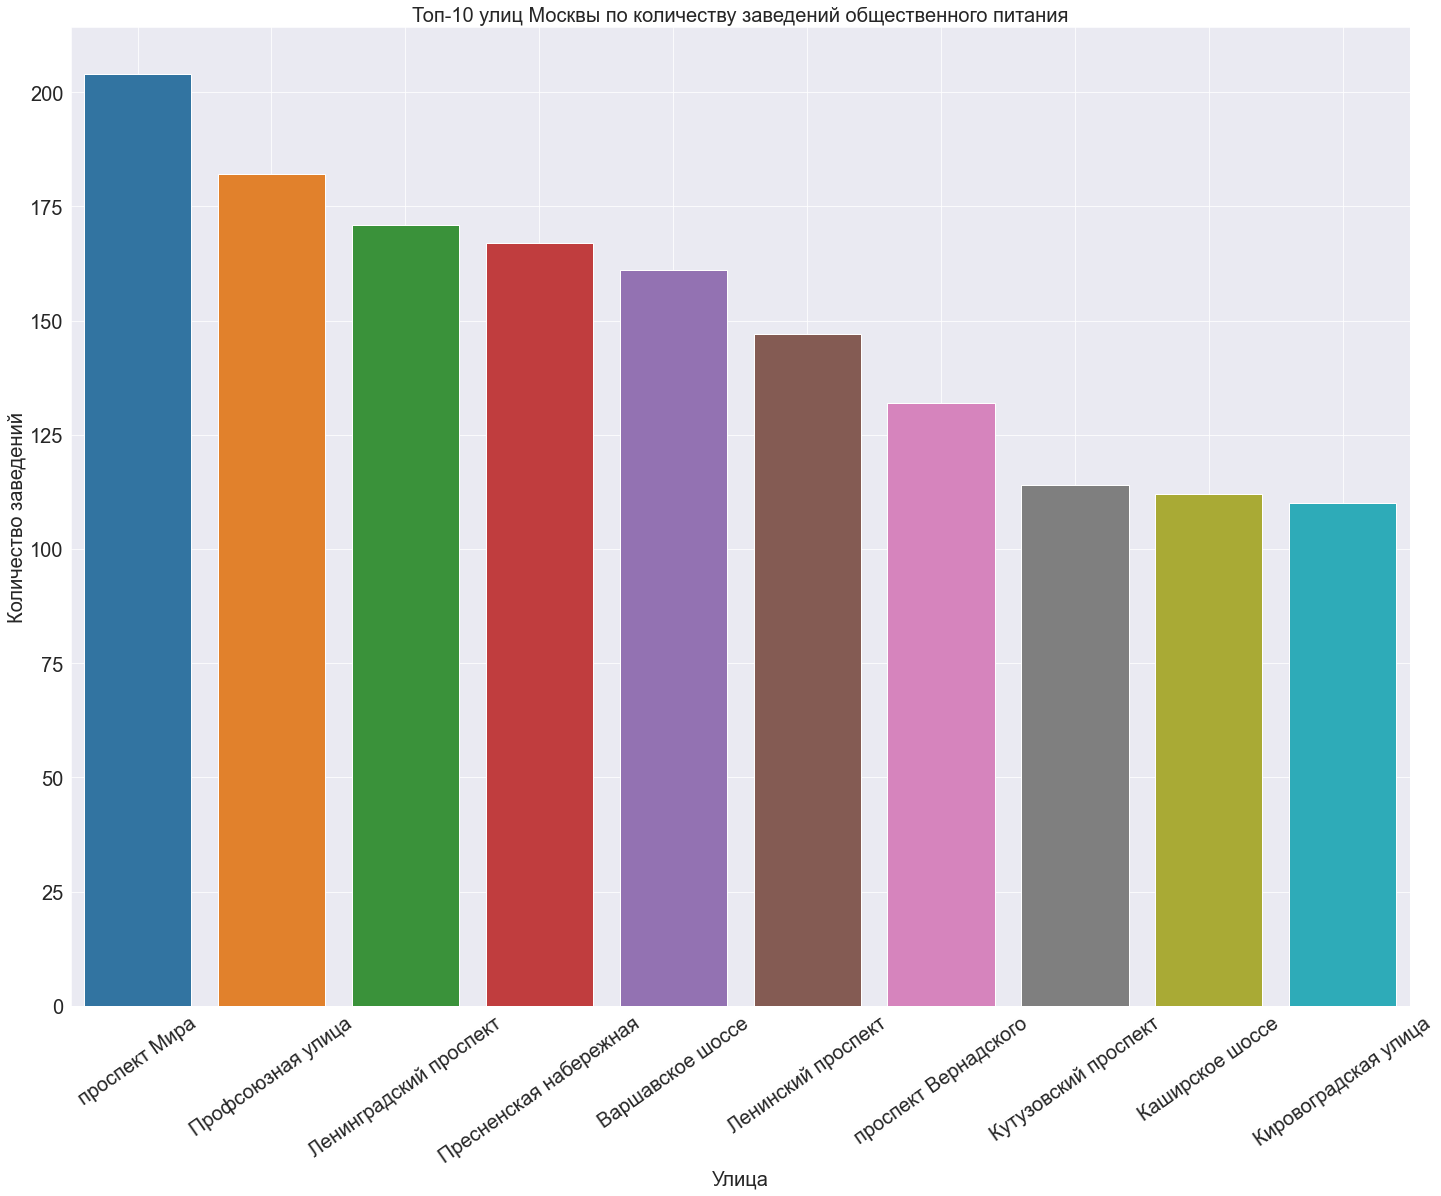

In [32]:
# Построим график
fig, ax = plt.subplots(1, 1, figsize=(24, 18))
sns.set_style('darkgrid')
fig = sns.barplot(x='street', y='id', data=top10_str_dist, ci=None)
plt.title(
    'Топ-10 улиц Москвы по количеству заведений общественного питания', fontsize=20)
plt.xticks(rotation=35, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Улица', fontsize=20)
plt.ylabel('Количество заведений', fontsize=20)
#plt.savefig('26', dpi=200, format='png')
plt.grid(True)
plt.show()

#### Промежуточный вывод: Лидерами по количеству заведений общественного питания являются проспект Мира, Профсоюзная улица и Ленинградский проспект.

#### <a class="anchor" id="step8">[2.7 Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?](#step0)</a>

In [33]:
# Найдем эти улицы
rest_data_query = rest_data_moscow.groupby(
    ['street'])['id'].count().reset_index()
streets_with_one_rest = rest_data_query[rest_data_query['id'] == 1]
anti_top_streets = streets_with_one_rest.merge(
    district_data, left_on='street', right_on='streetname')

# Количество таких районов найдем так
display(anti_top_streets)
anti_top_count = anti_top_streets['street'].unique()
display(pd.Series(anti_top_count))
# print(anti_top_streets['area'].unique())

street  id             streetname  areaid okrug  \
0     Авиационный переулок   1   Авиационный переулок      54   САО   
1     Автомобильный проезд   1   Автомобильный проезд     117  ЮВАО   
2          Алымов переулок   1        Алымов переулок      22   ВАО   
3    Андроньевская площадь   1  Андроньевская площадь      18   ЦАО   
4          Анненская улица   1        Анненская улица      78  СВАО   
..                     ...  ..                    ...     ...   ...   
434         улица Шеногина   1         улица Шеногина      92  СЗАО   
435         улица Шумилова   1         улица Шумилова     113  ЮВАО   
436          улица Шумкина   1          улица Шумкина      26   ВАО   
437            улица Щорса   1            улица Щорса      46   ЗАО   
438           шоссе Фрезер   1           шоссе Фрезер     117  ЮВАО   

                        area  
0             Район Аэропорт  
1        Нижегородский район  
2          Район Богородское  
3            Таганский район  
4         Район Марьина роща  
..                       ...  
434  Район Хорошево-Мневники  
435          Район Кузьминки  
436         Район Сокольники  
437           Район Солнцево  
438      Нижегородский район  

[439 rows x 6 columns]

0       Авиационный переулок
1       Автомобильный проезд
2            Алымов переулок
3      Андроньевская площадь
4            Анненская улица
               ...          
397           улица Шеногина
398           улица Шумилова
399            улица Шумкина
400              улица Щорса
401             шоссе Фрезер
Length: 402, dtype: object

In [34]:
# Построим график
# Для этого найдем топ10 самых непопулярных районов и посмотрим что получилось
unpop_districts = anti_top_streets.groupby('area')['id'].count().reset_index()
display(unpop_districts.sort_values(by='id', ascending=False)[0:10])

area  id
88       Таганский район  24
3        Басманный район  24
75       Район Хамовники  21
20     Пресненский район  19
89        Тверской район  17
21           Район Арбат  16
13       Мещанский район  14
69  Район Соколиная Гора  10
45       Район Лефортово   9
32   Район Замоскворечье   9

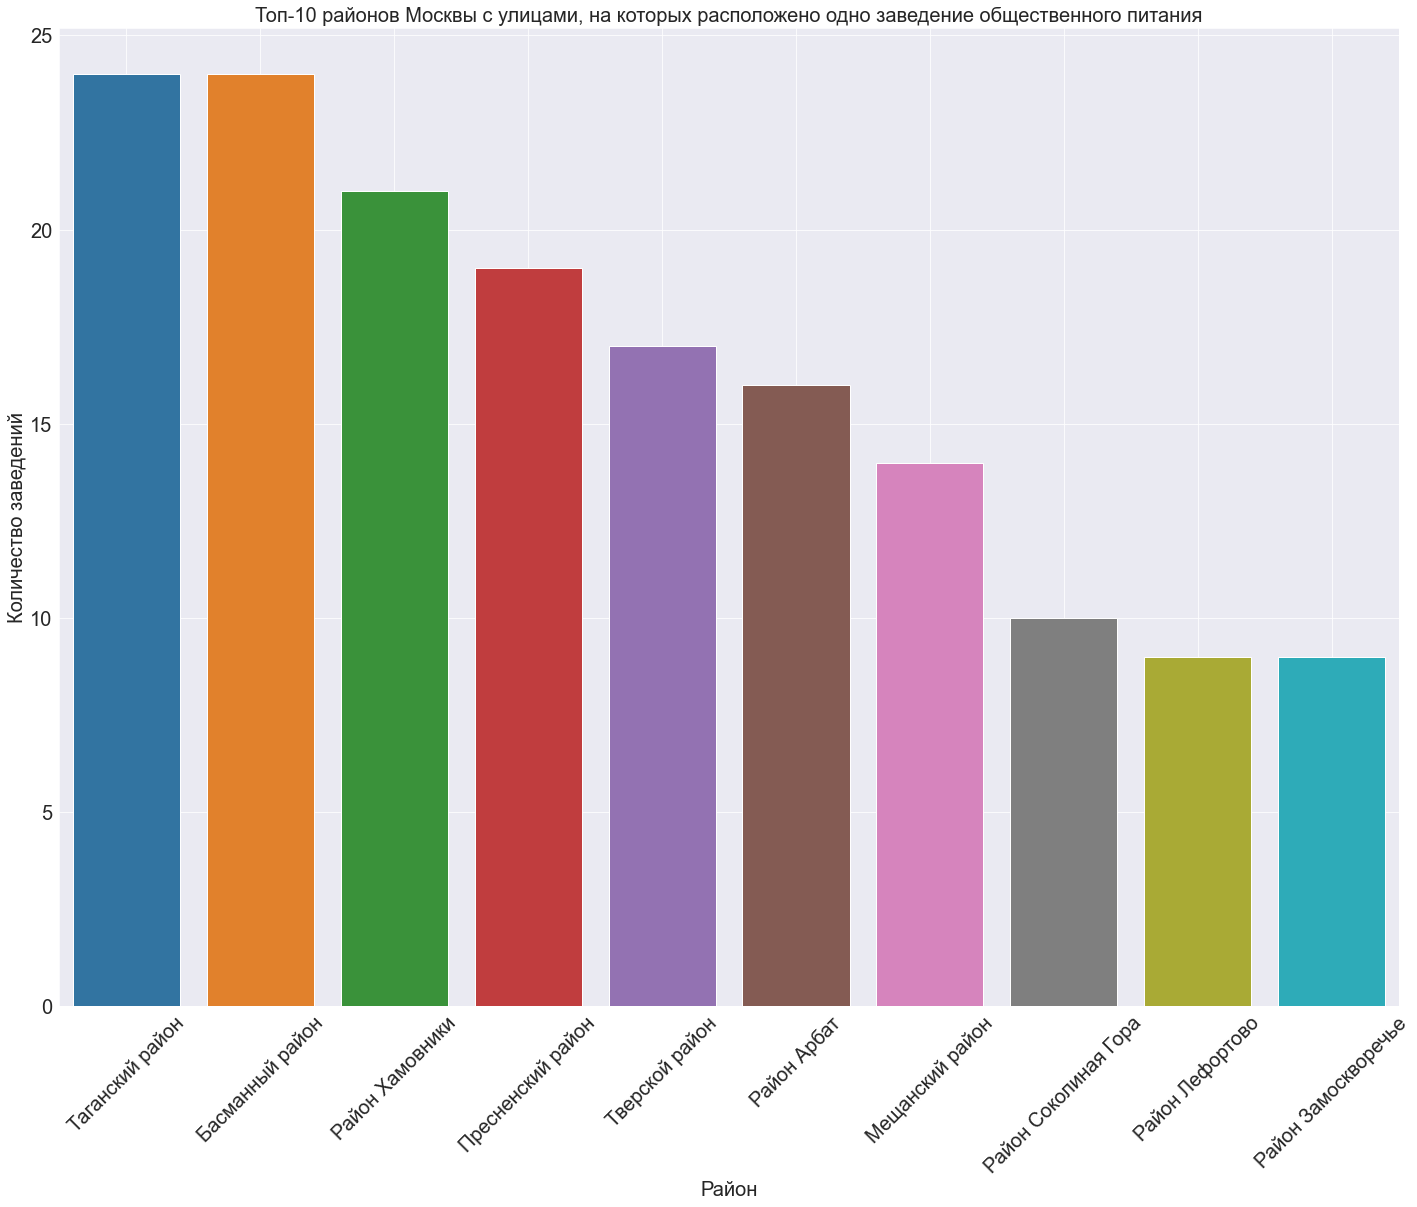

In [35]:
# Непосредственно график
fig, ax = plt.subplots(1, 1, figsize=(24, 18))
sns.set_style('darkgrid')
fig = sns.barplot(x='area', y='id', data=unpop_districts.sort_values(
    by='id', ascending=False)[0:10], ci=None)
plt.title('Топ-10 районов Москвы с улицами, на которых расположено одно заведение общественного питания', fontsize=20)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Район', fontsize=20)
plt.ylabel('Количество заведений', fontsize=20)
#plt.savefig('27', dpi=200, format='png')
plt.grid(True)
plt.show()

#### Промежуточный вывод: Получено 402 улицы с одним объектом общественного питания. Построен график "анти-топ" районов Москвы, где такие улицы встречаются. За исключением Соколиной Горы эти районы принадлежат к центру города. В центра очень дорогая аренда помещения, поэтому и встречаются улицы с одним объектом общественного питания.

#### <a class="anchor" id="step9">[2.8 Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?](#step0)</a>

In [36]:
# Выберем улицы с большим количеством объектов общественного питания
many_objects = rest_data_moscow.groupby('street')['id'].count().reset_index()
many_objects.columns = ['street', 'objects_count']
display(many_objects)

street  objects_count
0              Абельмановская улица              3
1                Абрамцевская улица             12
2                 Авангардная улица              3
3                Авиамоторная улица             31
4                 Авиационная улица             12
...                             ...            ...
1711             улица летия Москвы              4
1712            улица летия Октября              5
1713  улица ти Бакинских Комиссаров              6
1714                   шоссе Фрезер              1
1715              шоссе Энтузиастов             47

[1716 rows x 2 columns]

In [37]:
# Категоризируем данные
print(np.percentile(many_objects['objects_count'], [25, 50, 75]))

[1. 3. 8.]


За улицы с большим количеством объектов общественного питания примем улицы с количеством общепитов большим или равным 8

In [38]:
# Посчитаем среднее и медианное количество посадочных мест для улиц Москвы
memed = rest_data_moscow.groupby('street').agg(
    {'number': ['mean', 'median']}).reset_index()
memed.columns = memed.columns.droplevel(0)
memed.columns = ['street', 'mean', 'median']
memed['mean'] = memed['mean'].astype('int')
memed['median'] = memed['median'].astype('int')
display(memed)

street  mean  median
0              Абельмановская улица    61      90
1                Абрамцевская улица    85      45
2                 Авангардная улица    63      20
3                Авиамоторная улица   103     110
4                 Авиационная улица    89      74
...                             ...   ...     ...
1711             улица летия Москвы   106      92
1712            улица летия Октября    30      30
1713  улица ти Бакинских Комиссаров    70      55
1714                   шоссе Фрезер    10      10
1715              шоссе Энтузиастов    62      36

[1716 rows x 3 columns]

In [39]:
# Объединим то, что получилось
merged_data = many_objects.merge(memed, on='street')

# и выберем улицы с большим количеством объектов
final_data = merged_data[merged_data['objects_count'] >= 8]
display(final_data)

street  objects_count  mean  median
1      Абрамцевская улица             12    85      45
3      Авиамоторная улица             31   103     110
4       Авиационная улица             12    89      74
6     Автозаводская улица             67    44      20
10         Азовская улица             24    33      20
...                   ...            ...   ...     ...
1693      улица Шаболовка             45    53      40
1701        улица Щепкина             19    49      43
1707  улица Юных Ленинцев             22    93      65
1709   улица Ямского Поля             28    52      47
1715    шоссе Энтузиастов             47    62      36

[453 rows x 4 columns]

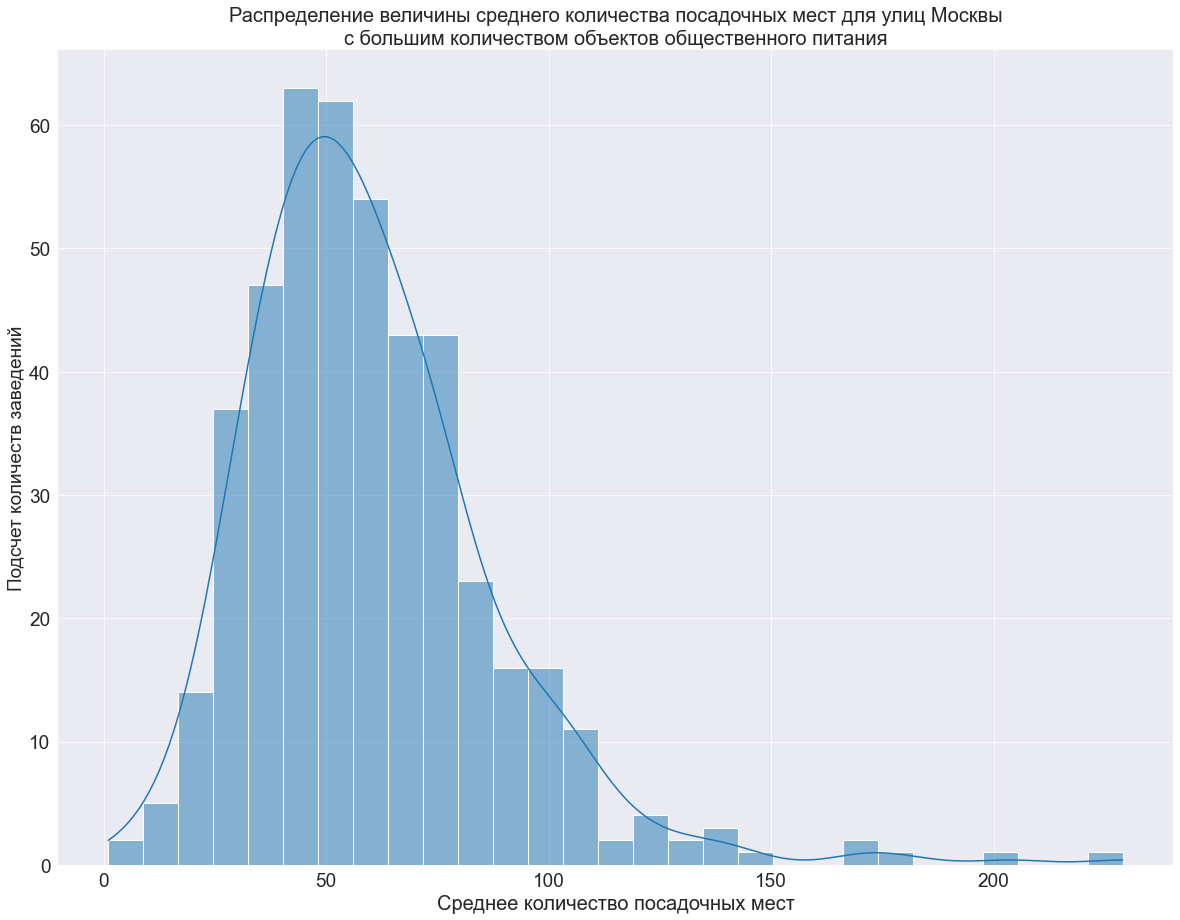

In [40]:
# Посмотрим на распределние среднего количества посадочных мест для улиц с большим количеством объектов
plt.figure(figsize=(20, 15))
sns.set_style('darkgrid')
sns.histplot(data=final_data, x='mean', kde=True)
plt.title('Распределение величины среднего количества посадочных мест для улиц Москвы\nс большим количеством объектов общественного питания', fontsize=20)
plt.xlabel('Среднее количество посадочных мест', fontsize=20)
plt.ylabel('Подсчет количеств заведений', fontsize=19)
plt.tick_params(axis='both', which='major', labelsize=19)
#plt.savefig('28', dpi=200, format='png', bbox_inches='tight')
plt.grid(True)
plt.show()

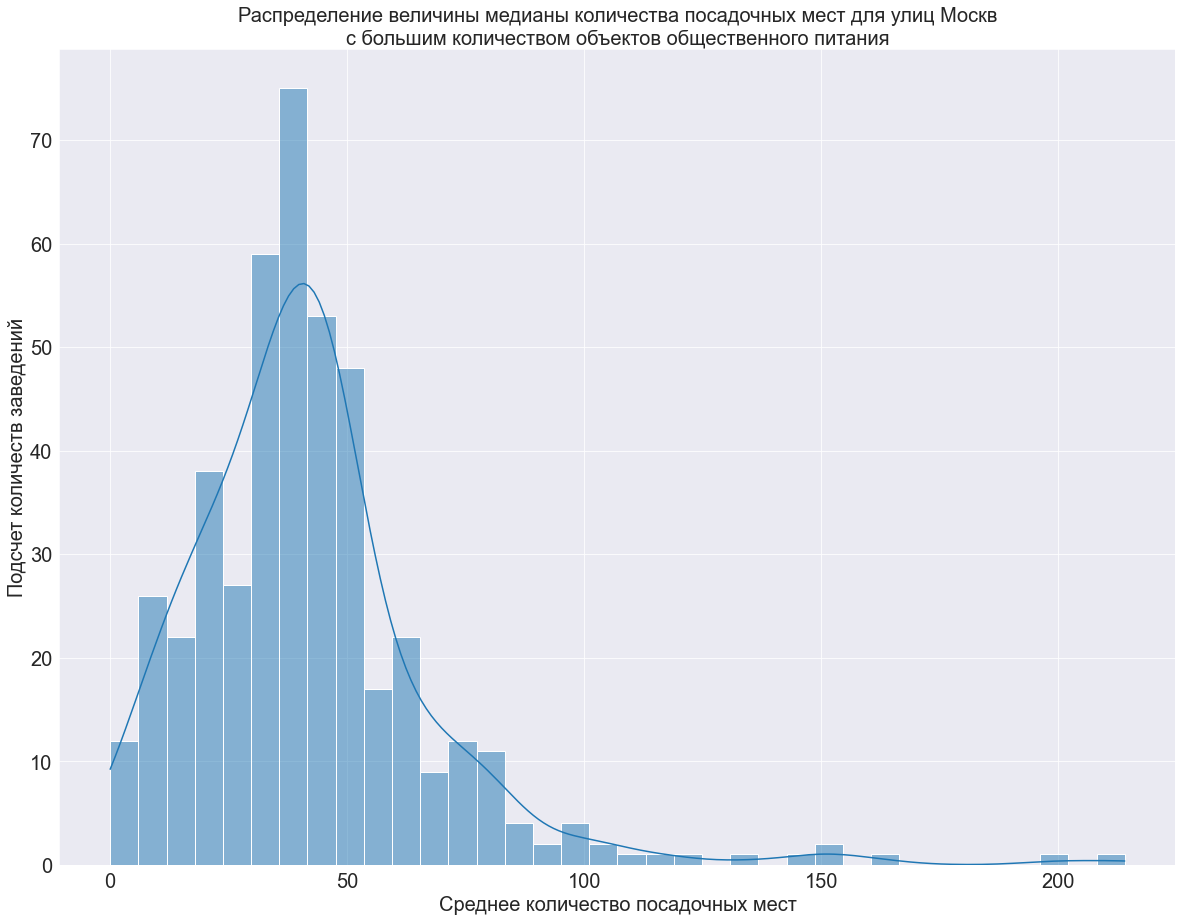

In [41]:
# Посмотрим на распределние среднего количества посадочных мест для улиц с большим количеством объектов
plt.figure(figsize=(20, 15))
sns.set_style('darkgrid')
sns.histplot(data=final_data, x='median', kde=True)
plt.title('Распределение величины медианы количества посадочных мест для улиц Москв\nс большим количеством объектов общественного питания', fontsize=20)
plt.xlabel('Среднее количество посадочных мест', fontsize=20)
plt.ylabel('Подсчет количеств заведений', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.show()

#### Промежуточный вывод: полученные распределения среднего и медианы для величины "количество посадочных мест" похожи на нормальные. По полученным графикам можно сделать вывод, что основное количество посадочных мест, встречающееся в объектах общественного питания, находится в интервале от 0 до 100. Наиболее часто встречающееся количество посадочных мест составляет 45-50 мест на заведение.

## <a class="anchor" id="step10">[3. Общий вывод](#step0)</a>

По итогам проведенного анализа можно сделать следующие выводы:

- лидерами среди открываемых общепитов являются - кафе, столовая, ресторан и фастфуд;
- несетевых заведений открывается ощутимо болше чем несетевых;
- для сетевых заведений характерно большое количество заведений с малым количеством посадочных мест;
- наибольшее количество посадочных мест предоставляет столовая и ресторан;
- наиболее подходящие улицы для открытия - проспект Мира, Профсоюзная улица, Ленинградский проспект;
- наиболее перспективные районы - Алексеевский, проспект Вернадского и Чертаново Центральное;
- наиболее "неудачные" районы - Басманный и Таганский;
- оптимальное число посадочных мест - 45-50.

*Будущему владельцу можно сделать следующие рекомендации - ему стоит открывать:*

- кафе(39,7%), столовую(16,8%) или ресторан(14,9%) как наиболее популярные типы заведений;

- несетевое заведение, так как их гораздо больше нежели сетевых;

- столовую(130 мест) или ресторан(100 мест) по количеству вместимости посетителей, у кафе уже вметсимость поменьше - 40 мест;

- по расположению улицы - наиболее привлекательны проспект Мира (всего открыто 204 заведения),Профсоюзная улица(182 заведения) и Ленинградский проспект(171 заведение). Так же хорошими вариантами будут - Пресненская набережная, Варшавское шоссе, Ленинский проспект, проспект Вернадского, Кутузовский проспект, Каширское шоссе, Кировоградская улица (более 110 заведений на каждой)

- по расположению района - в районах проспект Вернадского и Чертаново центральное располагаются по две из топ-10 улиц по количеству заведений. Также популярные районы - это Алексеевский, Академический , Аэропорт и Пресненский;

- в таких районах как: Таганский, Басманный, Пресненский, Хамовники, Тверской, Арбат, Мещанский, Замоскворечье, Лефортово, а также Красносельский много улиц с одним заведением. Поскольку все эти районы находятся в центре города, причиной их непопулярности может быть высокая арендная плата.

- заведение с количеством посадочных мест равным 45-50 - как наиболее часто встречающееся значение для улиц с большим количеством объектов общественного питания.

Ссылка для просмотра презентации: https://drive.google.com/file/d/1g8UpU3bXbvqy56UR1wah5VbnDtehQ46m/view?usp=sharing.